# Problem Statement
### To build Neural Network and Random Forest model on the HR Employee Attrition Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Importing the dataset

In [205]:
df = pd.read_csv("C:/Users/Mannu sharma/Desktop/BA/HGS/HR_Employee_Attrition_Data.csv", header=0)

In [206]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [207]:
df.shape

(2940, 35)

In [102]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [103]:
pandas_profiling.ProfileReport(df)

Number of variables,35
Number of observations,2940
Total Missing (%),0.0%
Total size in memory,804.0 KiB
Average record size in memory,280.0 B
Numeric,22
Categorical,8
Boolean,1
Date,0
Text (Unique),0
Rejected,4


# Exploratory Data Analysis

In [208]:
df.drop(labels= ['EmployeeCount', 'EmployeeNumber', 'JobLevel', 'Over18', 'StandardHours'], axis= 1, inplace= True)

### Delete following columns:-
> EmployeeCount <br>
> EmployeeNumber <br>
> JobLevel <br>
> Over18 <br>
> StandardHours <br>

In [210]:
df = df[['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager',  'Attrition']]

In [211]:
df.iloc[:,:12].head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,Sales Executive
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,Research Scientist
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,Laboratory Technician
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,Research Scientist
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,Laboratory Technician


In [212]:
df.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

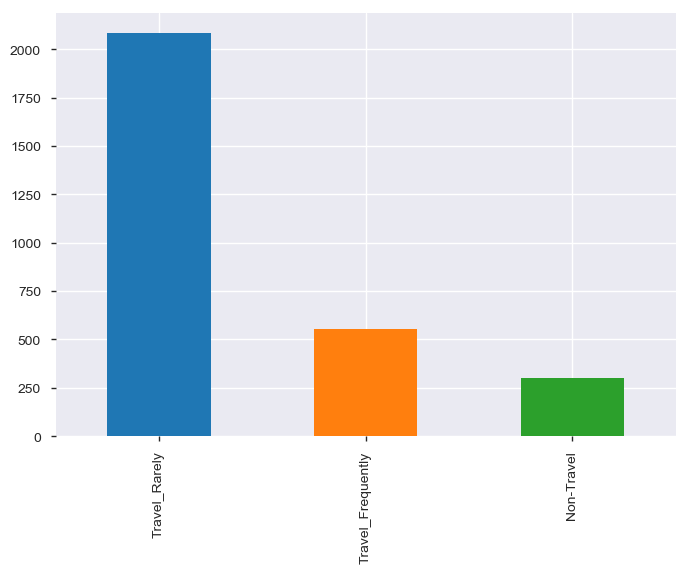

In [111]:
df.BusinessTravel.value_counts().plot.bar()

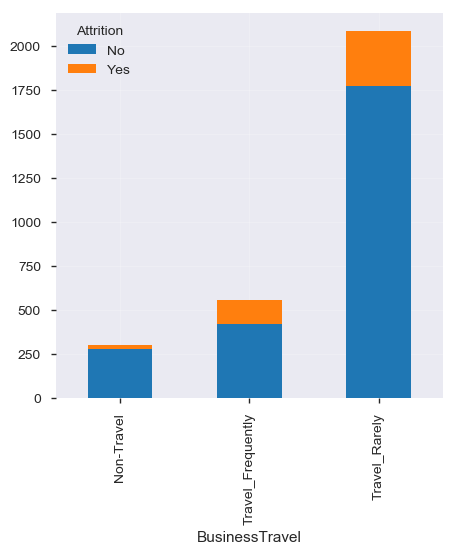

In [26]:
df.groupby(["BusinessTravel", "Attrition"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))
plt.grid(which='major',alpha=0.2)


* The attrition rate is very low for employees who don’t travel for business.
* The attrition rate is maximum for employees who have to travel frequently.

In [31]:
df.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

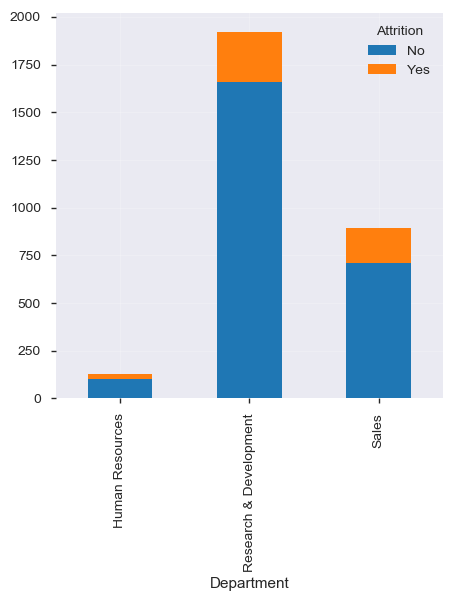

In [33]:
df.groupby(["Department", "Attrition"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))
plt.grid(which='major',alpha=0.2)

In [213]:
df["income"]=0
df.income[(df["MonthlyIncome"]>1000) & (df["MonthlyIncome"]<=3000)]=" Verylow"
df.income[(df["MonthlyIncome"]>3000) & (df["MonthlyIncome"]<=6000)]="Low"
df.income[(df["MonthlyIncome"]>6000) & (df["MonthlyIncome"]<=8000)]="Moderate"
df.income[(df["MonthlyIncome"]>8000) & (df["MonthlyIncome"]<=15000)]="High"
df.income[(df["MonthlyIncome"]>15000) & (df["MonthlyIncome"]<=20000)]="Very High"

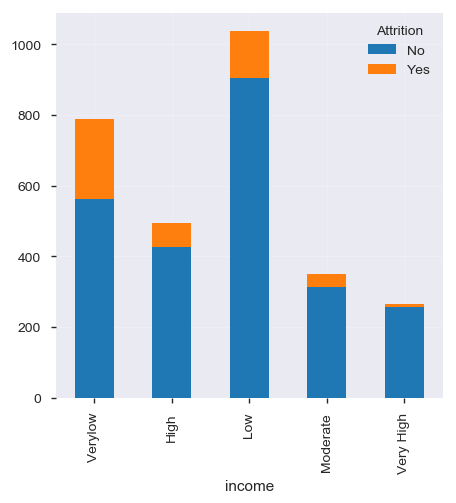

In [214]:
df.groupby(["income", "Attrition"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))
plt.grid(which='major',alpha=0.2)

* This is the most important factor in terms of attrition of the employee. 
* Employees tend to leave the organization if the income is lower than their expectation.
* The data shows the same. Attrition is high where income is very low and low where income is very high.


In [215]:
df.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition', 'income'],
      dtype='object')

In [216]:
df.drop(['income'],axis=1,inplace=True)

In [217]:
df.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

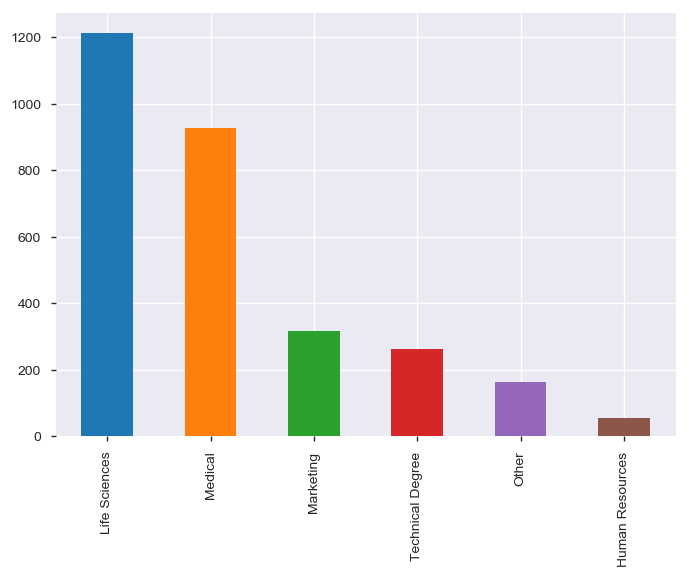

In [218]:
df.EducationField.value_counts().plot.bar()

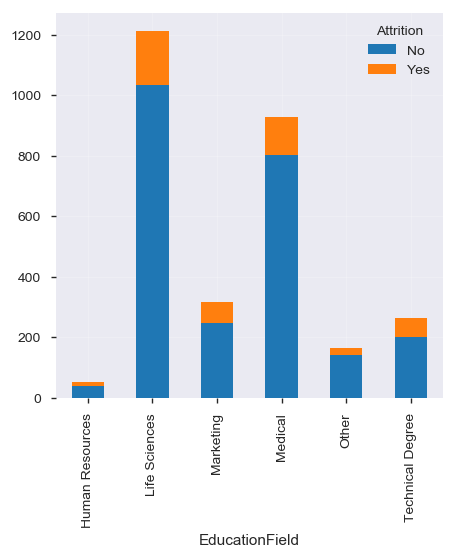

In [42]:
df.groupby(["EducationField", "Attrition"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))
plt.grid(which='major',alpha=0.2)

* Attrition rate is highest in human resources, marketing and technical degree. 

In [43]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

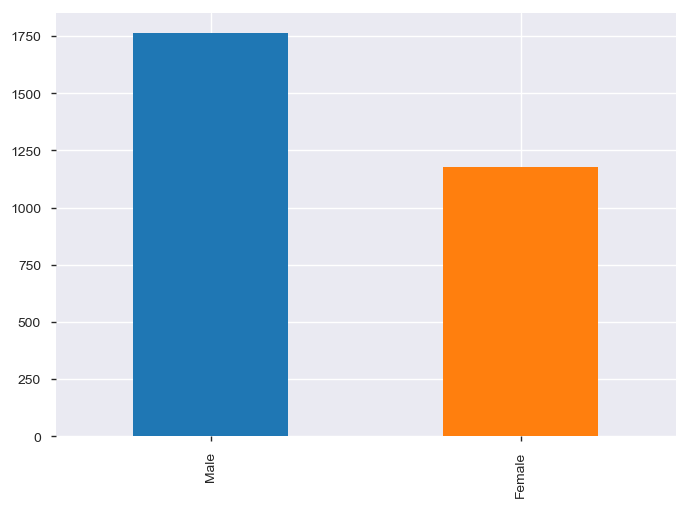

In [44]:
df.Gender.value_counts().plot.bar()

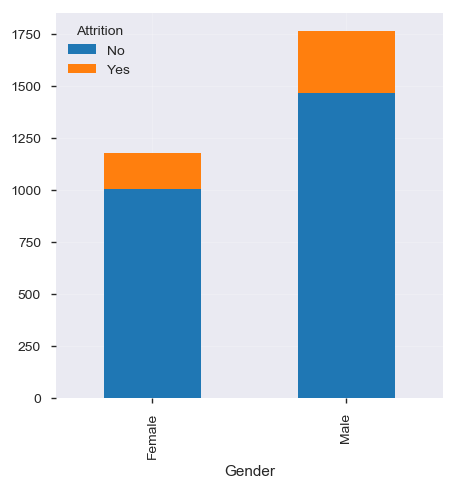

In [45]:
df.groupby(["Gender", "Attrition"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))
plt.grid(which='major',alpha=0.2)

In [46]:
df.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

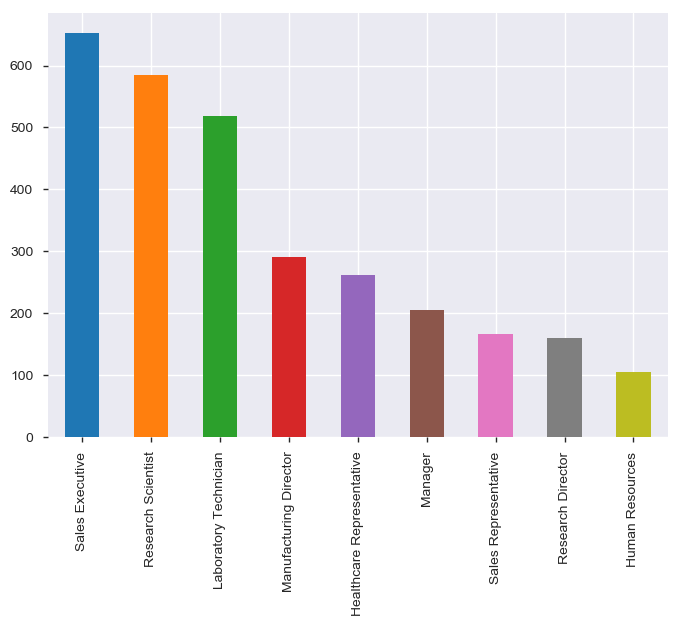

In [47]:
df.JobRole.value_counts().plot.bar()

In [48]:
df.MaritalStatus.unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

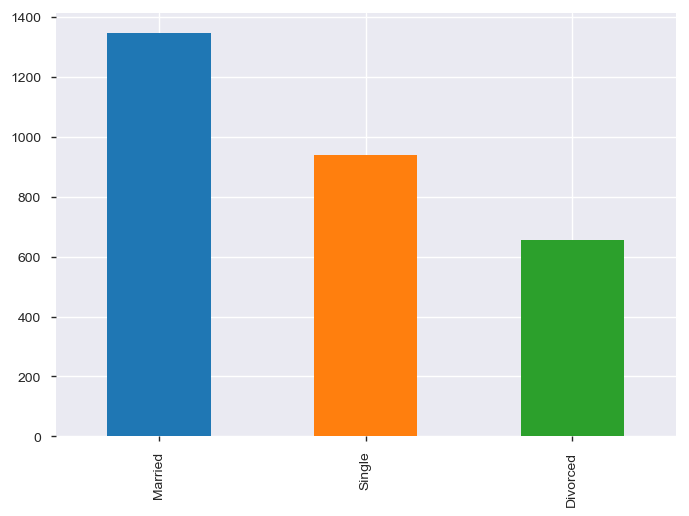

In [49]:
df.MaritalStatus.value_counts().plot.bar()

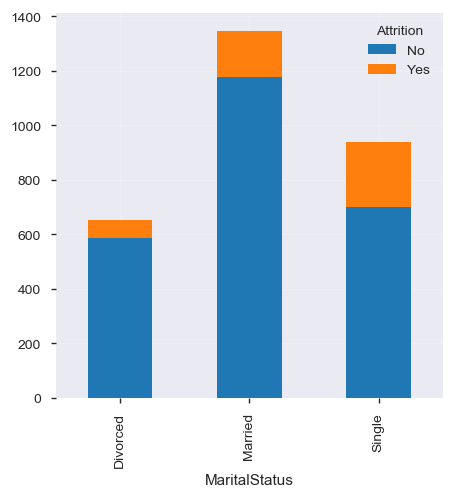

In [50]:
df.groupby(["MaritalStatus", "Attrition"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))
plt.grid(which='major',alpha=0.2)

* The attrition rate among single employees is significantly higher than that of married and divorced employees. 

In [51]:
df.OverTime.unique()

array(['Yes', 'No'], dtype=object)

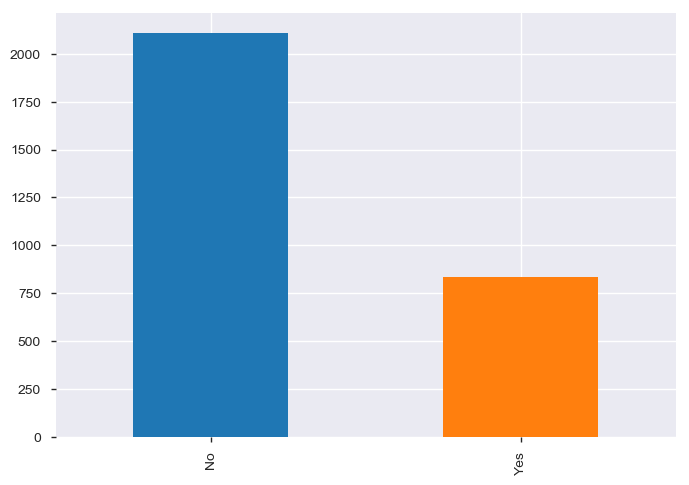

In [52]:
df.OverTime.value_counts().plot.bar()

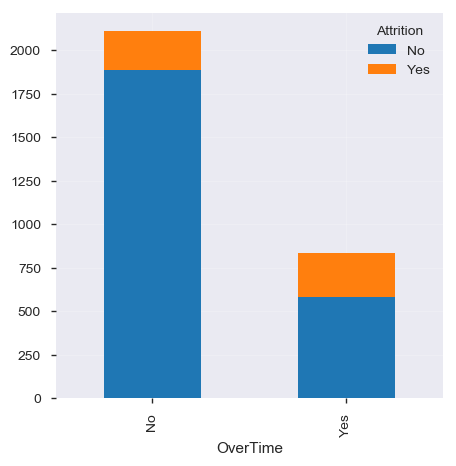

In [53]:
df.groupby(["OverTime", "Attrition"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))
plt.grid(which='major',alpha=0.2)

* Although there were less number of employees who worked overtime but the percentage of people who left the job was higher than those who did not work overtime

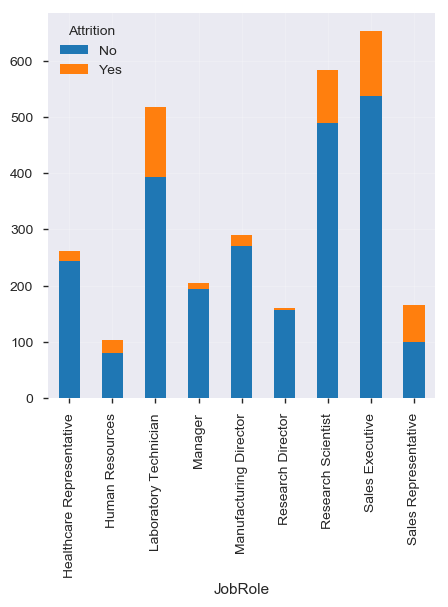

In [54]:
df.groupby(["JobRole", "Attrition"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))
plt.grid(which='major',alpha=0.2)

* Attrition rate is highest amongst sale representatives and least is in Research Director.


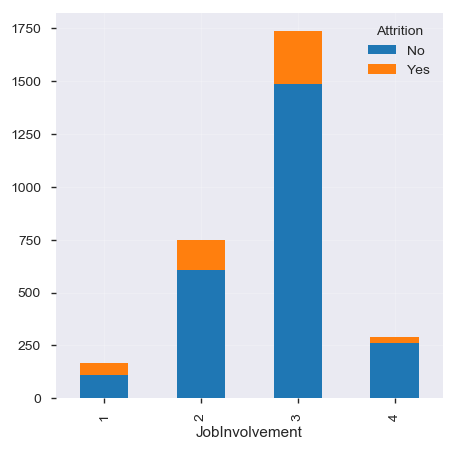

In [55]:
df.groupby(["JobInvolvement", "Attrition"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))
plt.grid(which='major',alpha=0.2)

* Job involvement has been defined as internalizing value of goodness and importance of working among people. 
* It is a desirable feature that makes people spend energy and do their best in their work and organizational roles. The same has been reflected in our data.
* Employees who were more involve in thier job has less attrition rate


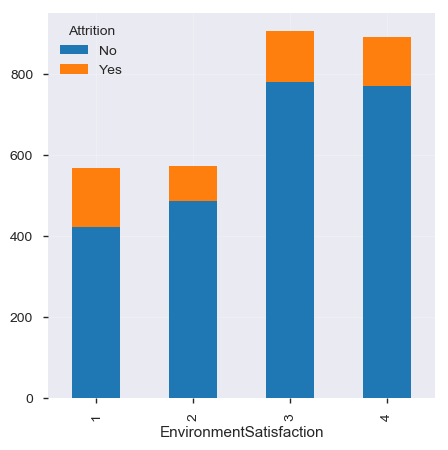

In [56]:
df.groupby(["EnvironmentSatisfaction", "Attrition"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))
plt.grid(which='major',alpha=0.2)

* A company's working environment affects employee behavior and job satisfaction.
* Attrition is higher among the employees having low environment satisfaction level.
* For the others, employees with satisfaction level from medium to very high level have more or less similar attrition


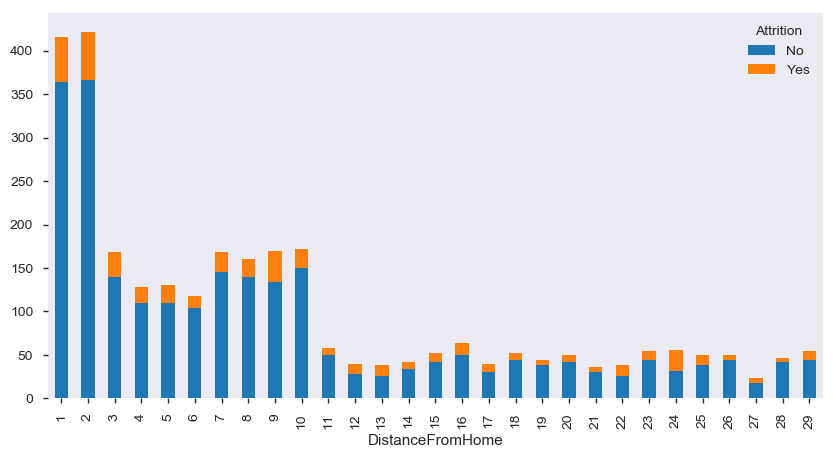

In [57]:
df.groupby(["DistanceFromHome", "Attrition"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5))
plt.grid(which='major',alpha=0.2)

* We observe that as the distance from home to work increases so does the attrition rate among the employees.

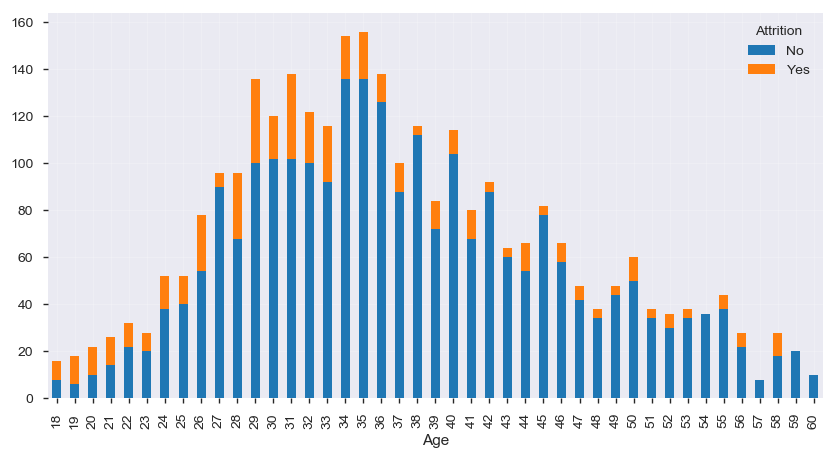

In [58]:
df.groupby(["Age", "Attrition"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5))
plt.grid(which='major',alpha=0.2)

* We have observed that the attrition rate among the  age group of 18-29 is higher  
* As the age increases beyond 29 the attrition rate decreases but we see another spike in the attrition rate for employees aged 58.


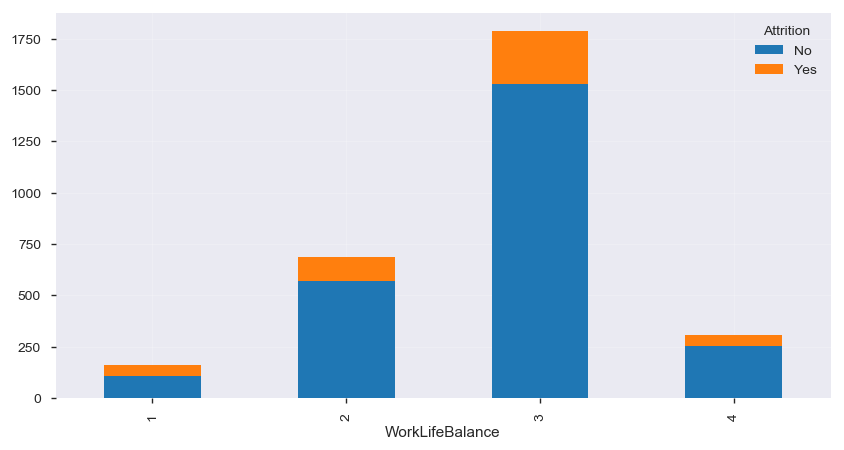

In [59]:
df.groupby(["WorkLifeBalance", "Attrition"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5))
plt.grid(which='major',alpha=0.2)

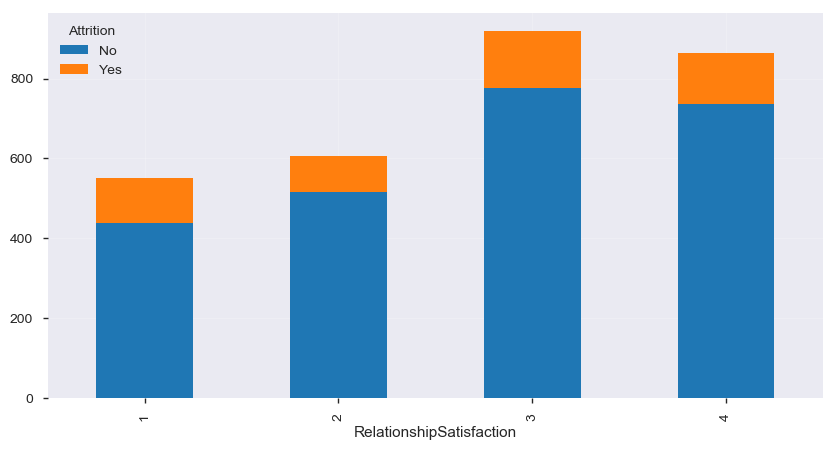

In [60]:
df.groupby(["RelationshipSatisfaction", "Attrition"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5))
plt.grid(which='major',alpha=0.2)

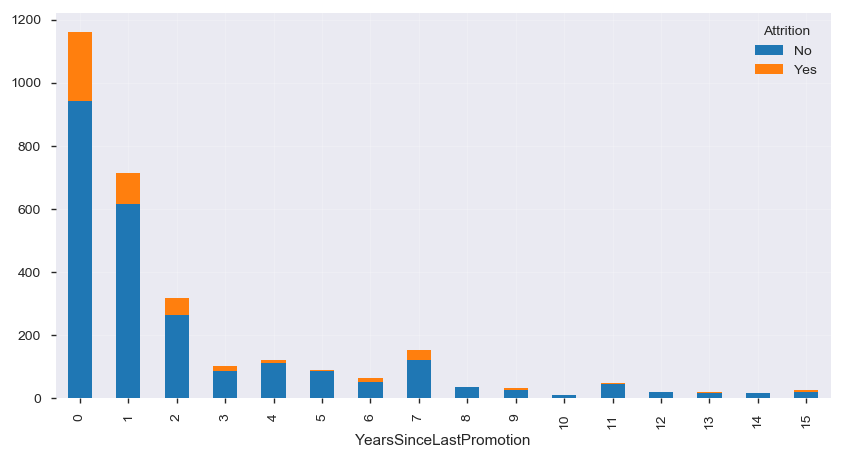

In [61]:
df.groupby(["YearsSinceLastPromotion", "Attrition"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5))
plt.grid(which='major',alpha=0.2)

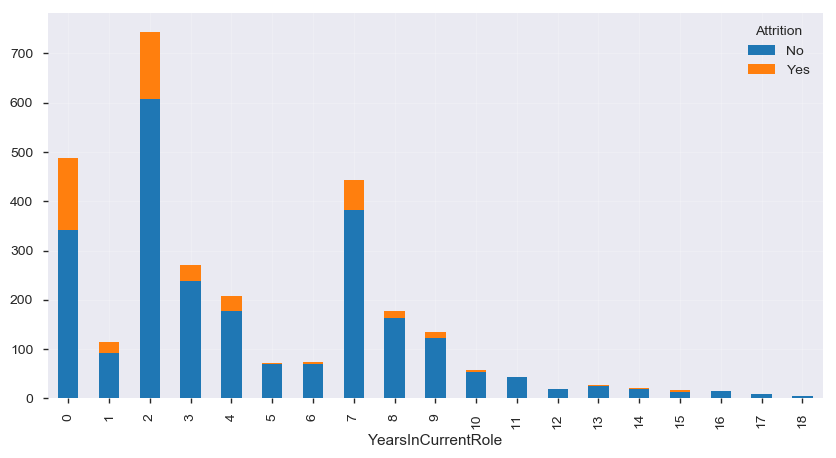

In [62]:
df.groupby(["YearsInCurrentRole", "Attrition"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5))
plt.grid(which='major',alpha=0.2)

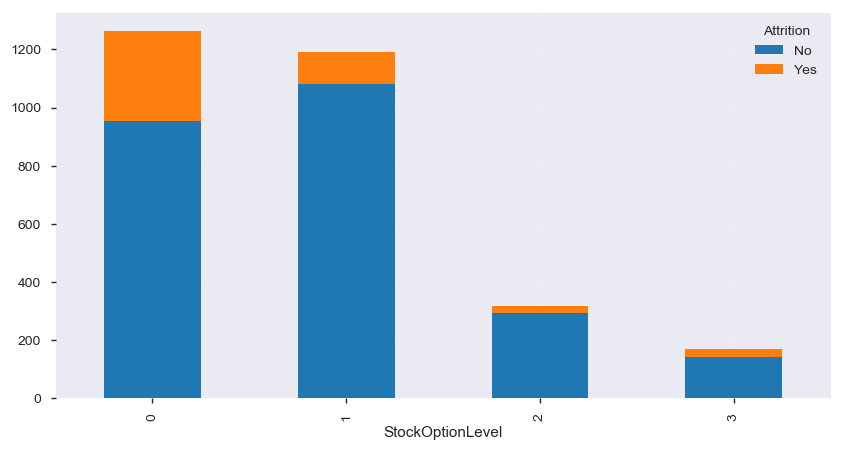

In [63]:
df.groupby(["StockOptionLevel", "Attrition"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5))
plt.grid(which='major',alpha=0.2)

* Attrition level is highest where employees are not holding  any stock options.
* This shows that attrition is in general higher in case of employees either having  no investment in stocks or employees having highest investments in stock options.


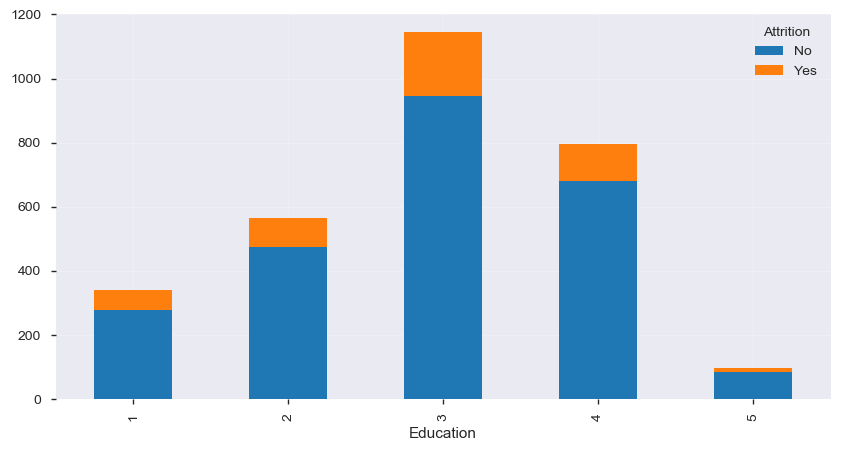

In [64]:
df.groupby(["Education", "Attrition"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5))
plt.grid(which='major',alpha=0.2)

* Attrition is highest in case of employees having education level as 1 and second highest for employees having level as 3
* Attrition is the lowest in case of Employees having education as level 5

In [219]:
cat_var=[]
num_var=[]
for col in df.columns:
    if df[col].dtypes=='O':
        cat_var.append(col)
    else:
        num_var.append(col)    
    

In [220]:
num_df=df[["Age","DailyRate",'DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [221]:
cat_var

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime',
 'Attrition']

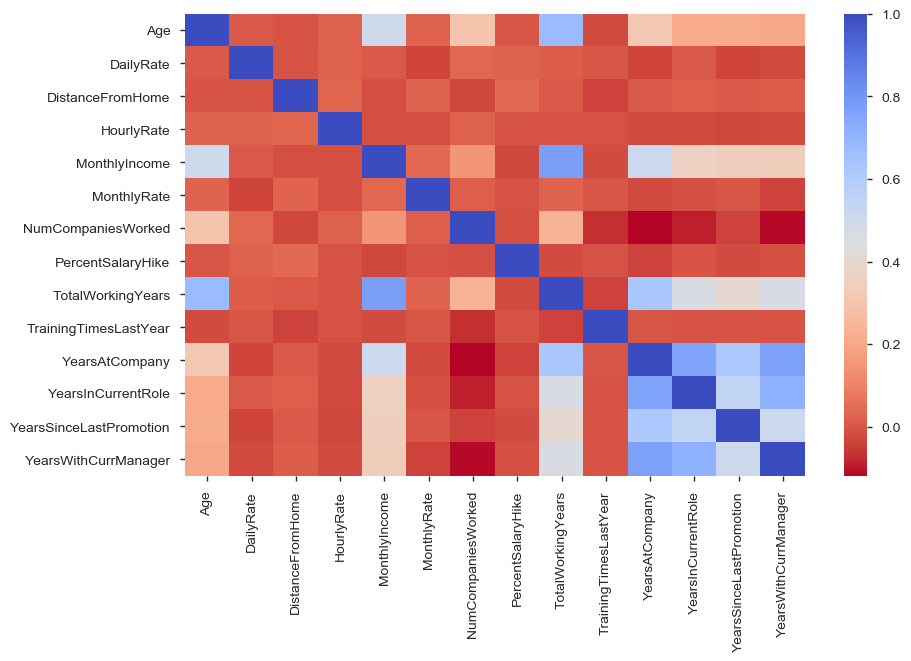

In [119]:
plt.figure(figsize=(10,6))
corr = num_df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':10})
plt.show()


In [222]:
table=pd.crosstab(df["YearsInCurrentRole"],df["Attrition"],margins=True,dropna=True)
stat, p, dof, expected = chi2_contingency(table)

In [223]:
cat_var1=cat_var[:-1]
cat_var1

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

## Hypothesis Testing

In [417]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [224]:
for col in cat_var1:
    table=pd.crosstab(df[col],df["Attrition"],margins=True,dropna=True)
    stat, p, dof, expected = chi2_contingency(table)
    print("For", col ,"the statistic,p value,Deg of Freedom:")
    print("Stat::",stat)
    print("DF::",dof)
    print("p value::",p,'\n')
    

For BusinessTravel the statistic,p value,Deg of Freedom:
Stat:: 48.36482737131034
DF:: 6
p value:: 9.989878150215532e-09 

For Department the statistic,p value,Deg of Freedom:
Stat:: 21.59201464482134
DF:: 6
p value:: 0.0014351709987594093 

For EducationField the statistic,p value,Deg of Freedom:
Stat:: 32.049348239170854
DF:: 12
p value:: 0.001359726477208392 

For Gender the statistic,p value,Deg of Freedom:
Stat:: 2.5504327204410364
DF:: 4
p value:: 0.6356283708766057 

For JobRole the statistic,p value,Deg of Freedom:
Stat:: 172.3805073534087
DF:: 18
p value:: 3.0757152586972e-27 

For MaritalStatus the statistic,p value,Deg of Freedom:
Stat:: 92.32735308169741
DF:: 6
p value:: 9.948337695319582e-18 

For OverTime the statistic,p value,Deg of Freedom:
Stat:: 178.08775724923862
DF:: 4
p value:: 1.9195041701112306e-37 



### Hypothesis for Chi Square Test of Independence

Null hypothesis: There is no association between the two variables.                                                        
Alternative hypothesis: There is an association between the two variables.

The critical value for the chi-square statistic is determined by the level of significance (typically .05) and the degrees of freedom.If the observed chi-square test statistic is greater than the critical value, the null hypothesis can be rejected.

Since Gender shows p-value more than 0.05 and other variables shows p-value below 0.05, null hypothesis can be rejected for all other variables and can say that the variables are associated with Attrition.  

In [225]:
df.Attrition.unique()

array(['Yes', 'No'], dtype=object)

In [123]:
df.Attrition.value_counts()/df.shape[0]

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

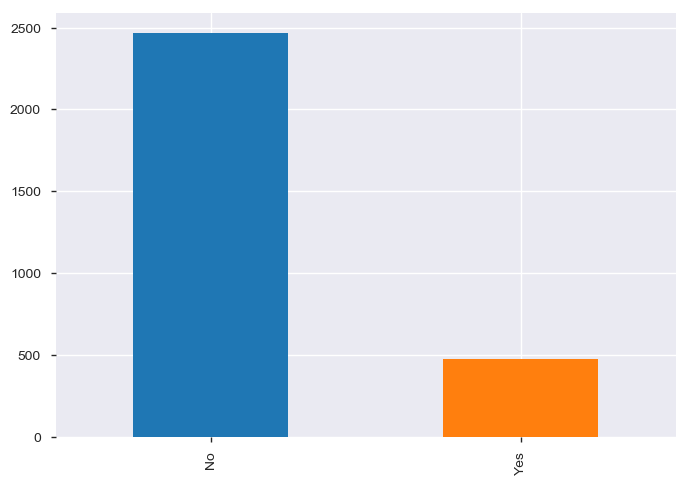

In [74]:
df.Attrition.value_counts().plot.bar()

### Imbalanced classification problem

**Use SMOTE to balance it.** <br>
**But before that do pre-processing.**

In [127]:
from sklearn.preprocessing import LabelEncoder

In [228]:
le = LabelEncoder()

In [229]:
df.loc[:, "Attrition"]= le.fit_transform(df.loc[:, "Attrition"])

In [230]:
df = pd.get_dummies(df, columns= cat_var1)

In [231]:
df.loc[:, "Attrition"] = le.fit_transform(df.loc[:, "Attrition"])

In [232]:
df.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Reso

In [233]:
df.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,4,5993,19479,...,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,3,61,2,2,5130,24907,...,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,92,2,3,2090,2396,...,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,4,56,3,3,2909,23159,...,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,1,40,3,2,3468,16632,...,0,0,0,0,0,0,1,0,1,0


In [234]:
df.shape

(2940, 51)

# Splitting the dataset

In [235]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(["Attrition"], axis= 1),df["Attrition"], test_size=0.3, random_state=11)

In [244]:
print("Number of Employees in X_train dataset: ", X_train.shape)
print("Number of Employees in y_train dataset: ", y_train.shape)
print("Number of Employees in X_test dataset: ", X_test.shape)
print("Number of Employees in y_test dataset: ", y_test.shape)

Number of Employees in X_train dataset:  (2058, 50)
Number of Employees in y_train dataset:  (2058,)
Number of Employees in X_test dataset:  (882, 50)
Number of Employees in y_test dataset:  (882,)


In [245]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
std=StandardScaler()
X_train1=std.fit_transform(X_train)
X_test1=std.transform(X_test)

In [246]:
sm = SMOTE(random_state= 2)

In [247]:
X_train_res, y_train_res = sm.fit_sample(X_train1, y_train.ravel())

In [248]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 327
Before OverSampling, counts of label '0': 1731 



In [249]:
print('After OverSampling, the shape of X_train: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of X_train: (3462, 50)
After OverSampling, the shape of y_train: (3462,) 

After OverSampling, counts of label '1': 1731
After OverSampling, counts of label '0': 1731


# Modelling:-

### Neural Network

In [3]:
import keras
from keras.layers import Dropout
from keras.layers import Dense
from keras.models import Sequential

Using TensorFlow backend.


In [268]:
classifier = Sequential()
classifier.add(Dense(output_dim=25,input_dim=50,init='uniform',activation='relu'))
classifier.add(Dropout(rate=0.01))
classifier.add(Dense(output_dim=25,input_dim=50,init='uniform'))
classifier.add(Dropout(rate=0.01))
classifier.add(Dense(output_dim=1,input_dim=50,init='uniform',activation='sigmoid'))

In [421]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
classifier.fit(X_train_res,y_train_res,nb_epoch=100,batch_size=10)

Epoch 1/100
3462/3462 [==============================] - 2s 685us/step - loss: 0.0098 - acc: 0.9968
Epoch 2/100
3462/3462 [==============================] - 1s 337us/step - loss: 0.0194 - acc: 0.9951
Epoch 3/100
3462/3462 [==============================] - 1s 377us/step - loss: 0.0148 - acc: 0.9965
Epoch 4/100
3462/3462 [==============================] - 1s 364us/step - loss: 0.0083 - acc: 0.9977
Epoch 5/100
3462/3462 [==============================] - 1s 344us/step - loss: 0.0134 - acc: 0.9954
Epoch 6/100
3462/3462 [==============================] - 1s 384us/step - loss: 0.0081 - acc: 0.9983
Epoch 7/100
3462/3462 [==============================] - 1s 355us/step - loss: 0.0108 - acc: 0.9971ETA: 1s - loss: 4
Epoch 8/100
3462/3462 [==============================] - 1s 400us/step - loss: 0.0125 - acc: 0.9957
Epoch 9/100
3462/3462 [==============================] - 1s 400us/step - loss: 0.0174 - acc: 0.9951
Epoch 10/100
3462/3462 [==============================] - 1s 396us/step - loss: 0.0

In [418]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix

In [271]:
y_pred=classifier.predict(X_test1)
y_pred=(y_pred>0.5)

Text(67.8611,0.5,'Actual')

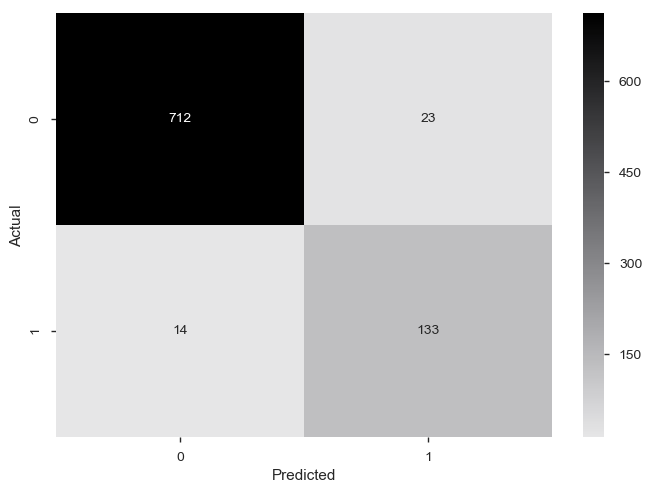

In [273]:
conf = (confusion_matrix(y_test,y_pred))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['0','1'],yticklabels=['0','1'],annot=True, fmt="d",)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [292]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy: 0.9580498866213152
Recall: 0.9047619047619048
Precision: 0.8525641025641025

 confussion matrix:
 [[712  23]
 [ 14 133]]


## Random Forest

In [415]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import roc_auc_score,accuracy_score,precision_score,recall_score,classification_report

In [276]:
rf=RandomForestClassifier()

In [280]:
param_grid_rf={'n_estimators':[100,200,500],'max_depth':[3,5,7,9]}

In [282]:
best_model_rf=GridSearchCV(estimator=rf,param_grid=param_grid_rf,scoring='roc_auc',cv=5)

In [285]:
best_model_rf.best_params_

{'max_depth': 9, 'n_estimators': 200}

In [284]:
best_model_rf.fit(X=X_train_res,y=y_train_res)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 200, 500], 'max_depth': [3, 5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

### Validation

In [289]:
cross_val_score(rf, X_train_res, y_train_res,scoring='roc_auc',cv=5).mean()

0.992447408430189

In [288]:
y_pred1=best_model_rf.predict(X_test1)

In [291]:
print('Accuracy:', accuracy_score(y_test, y_pred1))
print('Recall:', recall_score(y_test, y_pred1))
print('Precision:', precision_score(y_test, y_pred1))
print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred1))

Accuracy: 0.9501133786848073
Recall: 0.7551020408163265
Precision: 0.9327731092436975

 confussion matrix:
 [[727   8]
 [ 36 111]]


In [416]:
print('\n clasification report:\n', classification_report(y_test,y_pred1))


 clasification report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       735
           1       0.93      0.76      0.83       147

   micro avg       0.95      0.95      0.95       882
   macro avg       0.94      0.87      0.90       882
weighted avg       0.95      0.95      0.95       882



### Comparing Random Forest with Neural Network

In Testing Phase                                                                                                          

* Accuracy: It is better in Neural Network with 95.84% than Random Forest with 95.01%                                             
* Recall: It is better with Neural Network 90.47% than Random Forest with 75.51%                                                   
* Precision: It is better in Random Forest with 93.27% than NN with 85.25% 